In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
d1 = pd.read_excel('data.xlsx',0)

In [3]:
d1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
d2 = pd.read_excel('data.xlsx',1)

In [5]:
d2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data_df = pd.concat([d1,d2])

In [7]:
pd.set_option('display.max_rows', None)
data_df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [8]:
data_df.shape

(1067371, 8)

In [9]:
data_df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [11]:
data_df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [12]:
data_df['Customer ID'].fillna(method='ffill',inplace=True)

Unknown is used to fill missing values because every product is unique and is text based so the use of the mode or forward fill would create some bias in the dataset analysis.

In [13]:
data_df['Description'].fillna('Unknown',inplace=True)

In [14]:
data_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [29]:
sample_size = 100000  
random_sample = data_df.sample(n=sample_size, random_state=42)

In [30]:
random_sample.shape

(100000, 8)

In [31]:
selected_features = ['Quantity', 'Price', 'Customer ID']
new_data = random_sample[selected_features]

In [32]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

In [33]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

In [34]:
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

[299999.99999999965, 210849.8433220174, 135523.15628478918, 88770.13542394878, 71762.90626526639, 57960.05815915275, 44804.22001260583, 37366.32531954448, 32181.762710992138]


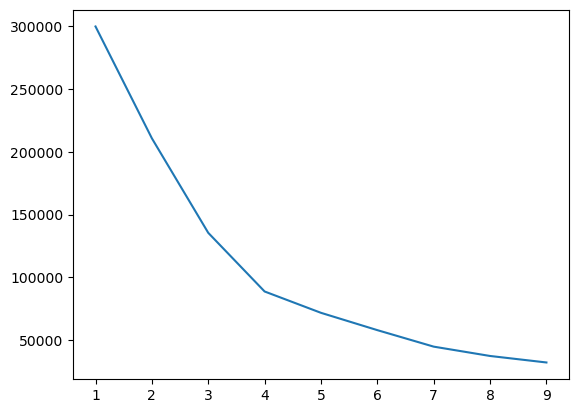

In [35]:
plt.plot(range(1,10), wcss);

In [36]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
print("Silhouette Score for KMeans:", kmeans_silhouette)

Silhouette Score for KMeans: 0.9916178450364995


In [37]:
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids

In [38]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

In [39]:
dbscan_silhouette = silhouette_score(data_scaled, dbscan_clusters)
print("Silhouette Score for DBSCAN:", dbscan_silhouette)

Silhouette Score for DBSCAN: 0.6644420046400935


In [ ]:
kmedoids = KMedoids(n_clusters=5, random_state=42)
kmedoids_clusters = kmedoids.fit_predict(data_scaled)

In [ ]:
kmedoids_silhouette = silhouette_score(data_scaled, kmedoids_clusters)
print("Silhouette Score for K-Medoids:", kmedoids_silhouette)

In [24]:
gdgrstrs

NameError: name 'gdgrstrs' is not defined

In [ ]:
data_encoded = pd.get_dummies(random_sample, columns=['Country', 'Description'])

In [ ]:
data_encoded['StockCode'].dtype


In [ ]:
data_encoded['StockCode'] = data_encoded['StockCode'].str.extract('(\d+)')


In [ ]:
missing_values = data_encoded.isna().sum()
print(missing_values)


In [ ]:
data_encoded.head()

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded[['Quantity', 'Customer ID', 'Price']])

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [ ]:
kmeans_clusters = kmeans.fit_predict(data_scaled)


In [ ]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

In [ ]:
plt.plot(range(2,10), wcss);

In [ ]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
print("Silhouette Score for KMeans:", kmeans_silhouette)


In [ ]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_clusters, cmap='viridis', s=50, edgecolors='k')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title(f'K-Means (Silhouette Score: {kmeans_silhouette:.2f})')
plt.xlabel('Quantity (Scaled)')
plt.ylabel('Price (Scaled)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

In [ ]:
plt.subplot(1, 3, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN')
plt.xlabel('Quantity (Scaled)')
plt.ylabel('Price (Scaled)')
plt.tight_layout()
plt.show()

In [ ]:
dfvdfd

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [ ]:
data_encoded = pd.get_dummies(data_df, columns=['Country', 'Description'])

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded[['Quantity', 'Price']])

In [ ]:
data_scaled

In [ ]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

In [ ]:
plt.plot(range(2,10), wcss);

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
data_scaled.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.fit(data_scaled)

kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title(f'K-Means (Silhouette Score: {kmeans_silhouette:.2f})')
plt.xlabel('Quantity (Scaled)')
plt.ylabel('Price (Scaled)')
plt.tight_layout()
plt.show()

Label encoder to be used to transform Country from a categorical feature into a numerical feature to be able to use it in clustering.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
data_df['New Country']=label.fit_transform(data_df['Country'])

In [ ]:
data_df.drop(['Country'],axis=1,inplace=True)

In [ ]:
data_df.head(100)

Drop categorical data and create a new dataset that consists of three features that will be clustered.

In [ ]:
new_data = data_df[['Quantity', 'Price', 'New Country']]

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=new_data, x='Quantity', bins=20, kde=True)
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.histplot(data=new_data, x='Price', bins=20, kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Quantity', y='Price')
plt.title('Scatter Plot of Quantity vs. Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_data[['Quantity', 'Price']])
plt.title('Box Plot of Quantity and Price')
plt.ylabel('Value')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=new_data, x='New Country', order=new_data['New Country'].value_counts().index)
plt.title('Bar Plot of New Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=new_data, x='New Country', y='Quantity')
plt.title('Violin Plot of Quantity by New Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.show()

sns.kdeplot(new_df['New Country'], shade=True,hue=new_data['Quantity']);

for i in columns:
    plt.figure()
    sns.displot(columns[i])

Using standard scaler to improve the performance of algorithms.

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(new_data)

In [ ]:
new_data.head()

In [ ]:
clustering1 = KMeans(n_clusters=2)

In [ ]:
clustering1.fit(new_data[['New Country']])

In [ ]:
clustering1.labels_

In [ ]:
new_data['Country Cluster']=clustering1.labels_
new_data.head()

In [ ]:
new_data['Country Cluster'].value_counts()

In [ ]:
clustering1.inertia_

In [ ]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(new_data[['New Country']])
    wcss.append(kmeans.inertia_)
print(wcss)

In [ ]:
plt.plot(range(1,10), wcss);

In [ ]:
new_data.groupby('Country Cluster')['Quantity', 
       'Price', 'New Country'].mean()

In [ ]:
clustering2 = KMeans(n_clusters=3)
clustering2.fit(new_data[['New Country','Quantity']])
new_data['Country Cluster and Quantity'] = clustering2.labels_
new_data.head()

In [ ]:
wcss1 = []
for k in range(1, 10):
    kmeans1 = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans1.fit(new_data[['New Country','Quantity']])
    wcss1.append(kmeans1.inertia_)
print(wcss1)

In [ ]:
plt.plot(range(1,10), wcss1);

In [ ]:
sns.scatterplot(data=new_data, x='New Country', y='Quantity',hue='Country Cluster and Quantity')

In [ ]:
center = pd.DataFrame(clustering2.cluster_centers_)
center.columns = ['X', 'Y']

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=center['X'],y=center['Y'],s=100,c='black',marker='*')

sns.scatterplot(data=new_data, x='New Country', y='Quantity',hue='Country Cluster and Quantity')

In [ ]:
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans.fit_predict('Quantity')

In [ ]:
wcss = []
for k in range(0, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)
print(wcss)

In [ ]:
plt.plot(range(2,10), wcss);

In [ ]:
new_data['Country Cluster'] = kmeans.labels_
new_data.head(100)

In [ ]:
def plotFeatures(col1, col2):
    plt.scatter(
        new_data[kmeans.labels_ == 0].iloc[:, col1],
        new_data[kmeans.labels_ == 0].iloc[:, col2],
        s=50,
        c='red',
        label='Cluster 1'
    )
    plt.scatter(
        new_data[kmeans.labels_ == 1].iloc[:, col1],
        new_data[kmeans.labels_ == 1].iloc[:, col2],
        s=50,
        c='blue',
        label='Cluster 2'
    )
    plt.scatter(
        new_data[kmeans.labels_ == 2].iloc[:, col1],
        new_data[kmeans.labels_ == 2].iloc[:, col2],
        s=50,
        c='green',
        label='Cluster 3'
    )
    plt.scatter(
        kmeans.cluster_centers_[:, col1],
        kmeans.cluster_centers_[:, col2],
        s=100,
        c='yellow',
        label='Centroids'
    )
    plt.xlabel(new_data.columns[col1])
    plt.ylabel(new_data.columns[col2])
    plt.legend()
    plt.title('Clustering based on ' + new_data.columns[col1] + ' and ' + new_data.columns[col2])
    plt.show()

plotFeatures(0, 1)  


In [ ]:
plotFeatures(0,2)

In [ ]:
plotFeatures(1,2)

kmeans = KMeans(n_clusters=3,n_init=10,random_state=42)

y_pred = kmeans.fit_predict(x)

y_pred

wcss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(2,10),wcss);

silhouette_score(x,y_pred)

In [ ]:
clustering1 = KMeans()

In [ ]:
clustering1.fit(new_data[['New Country']])

In [ ]:
clustering1.labels_
#for label in clustering1.labels_:
    #print(label)


In [ ]:
new_data['Country Cluster'].value_counts()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids


In [ ]:
df = data_df[['Quantity','Price']]

In [ ]:
df.head()

In [ ]:
standard = StandardScaler()

In [ ]:
x = standard.fit_transform(df)

In [ ]:
coumns = df.columns

In [ ]:
coumns

In [ ]:
df = pd.DataFrame(standard.fit_transform(df),columns=coumns)

In [ ]:
df.head()

K-elbow method

In [ ]:
wcss = []
for k in range (2,10):
    kmeans = KMeans(n_clusters = k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,10),wcss);    

Silhouette Score

wcss = []
for k in range (2,10):
    kmeans = KMeans(n_clusters = k,random_state=42)
    y_kmeans = kmeans.fit_predict(df)
    wcss.append(silhouette_score(df,y_kmeans))
plt.plot(range(2,10),wcss);    